# Food Desert Definition Analysis
By: Emily Donofrio

Link to data: [Food Access Research Atlas 2019](https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
file_path = '/content/FoodAccessResearchAtlasData2019.xlsx'
# df will contain the data as a pandas DataFrame.
# meta will contain metadata about the file, such as variable labels, value labels, and more.
food = pd.read_excel(file_path, sheet_name='Food Access Research Atlas')
# Display the first few rows of the dataframe
food.head()

CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  \
0                  0       0.0  0.000000                  0   
1                  0     181.0  8.341014                  1   
2                  0       0.0  0.000000                  0   
3                  0       0.0  0.000000                  0   
4                  0     181.0  1.681219                  0   

   LILATracts_halfAnd10  LILATracts_1And20  LILATracts_Vehicle  HUNVFlag  \
0                     0                  0                   0         0   
1                     1                  1                   0         0   
2                     0                  0                   0         0   
3                     0                  0                   0         0   
4                     0                  0                   0         1   

   LowIncomeTracts  PovertyRate  MedianFamilyIncome  LA1and10  LAhalfand10  \
0                0    11.336453             81250.0         1            1   
1                1    17.876788             49000.0         1            1   
2                0    15.046030             62609.0         1            1   
3                0     2.845210             70607.0         1            1   
4                0    15.150891             96334.0         1            1   

   LA1and20  LATracts_half  LATracts1  LATracts10  LATracts20  \
0         1              1          1           0           0   
1         1              1          1           0           0   
2         1              1          1           0           0   
3         1              1          1           0           0   
4         1              1          1           0           0   

   LATractsVehicle_20    LAPOP1_10   LAPOP05_10    LAPOP1_20  LALOWI1_10  \
0                   0  1896.493338  1912.000004  1896.493338  460.998748   
1                   0  1260.991651  2169.999998  1260.991651  603.892737   
2                   0  1551.703935  2856.859242  1551.703935  478.260886   
3                   0  1363.466885  3651.061015  1363.466885  343.215663   
4                   1  2643.095161  7778.396188  2643.095161  586.413137   

   LALOWI05_10  LALOWI1_20    lapophalf  lapophalfshare   lalowihalf  \
0   466.972228  460.998748  1912.000004      100.000000   466.972228   
1   962.199453  603.892737  2169.999998      100.000000   962.199453   
2   971.112475  478.260886  2856.859242       84.697873   971.112475   
3   893.201509  343.215663  3651.061015       83.243525   893.201509   
4  1718.885310  586.413137  7778.396188       72.249639  1718.885310   

   lalowihalfshare   lakidshalf  lakidshalfshare  laseniorshalf  \
0        24.423234   507.000002        26.516736     221.000002   
1        44.340989   606.000004        27.926267     214.000001   
2        28.790764   771.040463        22.859190     357.634554   
3        20.364831   846.613783        19.302640     766.521491   
4        15.965868  2309.475651        21.451567     839.885471   

   laseniorshalfshare  lawhitehalf  lawhitehalfshare  lablackhalf  \
0           11.558578  1622.000008         84.832636   216.999999   
1            9.861751   888.000003         40.921659  1216.999994   
2           10.602863  2176.590247         64.529803   554.235596   
3           17.476550  3395.061920         77.406793   170.065452   
4            7.801277  6298.710335         58.505576  1000.678496   

   lablackhalfshare  laasianhalf  laasianhalfshare  lanhopihalf  \
0         11.349372    14.000000          0.732218     0.000000   
1         56.082949     5.000000          0.230415     0

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


In [ ]:
food['CensusTract'].nunique()

72531

### Data preprocessing

In [ ]:
# Convert all the tract variables to % of population
tract_cols = [col for col in food.columns if col.startswith('Tract')]

for col in tract_cols:
    food[col] = (food[col] / food['Pop2010']) * 100


In [ ]:
efa_cols = ['Pop2010', 'OHU2010', 'PCTGQTRS', 'PovertyRate', 'MedianFamilyIncome', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP']
target_col = ['LA1and10']

my_data = food[efa_cols + target_col]

### Missing Data Analysis

In [ ]:
# Check for missing values
my_data.isnull().sum()

Pop2010                 0
OHU2010                 0
PCTGQTRS               25
PovertyRate             3
MedianFamilyIncome    748
TractLOWI               4
TractKids               4
TractSeniors            4
TractWhite              4
TractBlack              4
TractAsian              4
TractNHOPI              4
TractAIAN               4
TractOMultir            4
TractHispanic           4
TractHUNV               4
TractSNAP               4
LA1and10                0
dtype: int64

In [ ]:
# drop
my_data = my_data[my_data['TractLOWI'].notna()]
my_data.isnull().sum()

Pop2010                 0
OHU2010                 0
PCTGQTRS               21
PovertyRate             0
MedianFamilyIncome    745
TractLOWI               0
TractKids               0
TractSeniors            0
TractWhite              0
TractBlack              0
TractAsian              0
TractNHOPI              0
TractAIAN               0
TractOMultir            0
TractHispanic           0
TractHUNV               0
TractSNAP               0
LA1and10                0
dtype: int64

In [ ]:
# Are the missing median income values disproportionate
# Split the data into two groups
missing_income = my_data[my_data['MedianFamilyIncome'].isna()]
not_missing_income = my_data[my_data['MedianFamilyIncome'].notna()]

# Calculate mean PovertyRate for each group
mean_poverty_missing = missing_income['PovertyRate'].mean()
mean_poverty_not_missing = not_missing_income['PovertyRate'].mean()

print("Mean Poverty Rate where MedianFamilyIncome is MISSING:", mean_poverty_missing)
print("Mean Poverty Rate where MedianFamilyIncome is NOT missing:", mean_poverty_not_missing)

Mean Poverty Rate where MedianFamilyIncome is MISSING: 25.12733811484188
Mean Poverty Rate where MedianFamilyIncome is NOT missing: 15.080073866414635


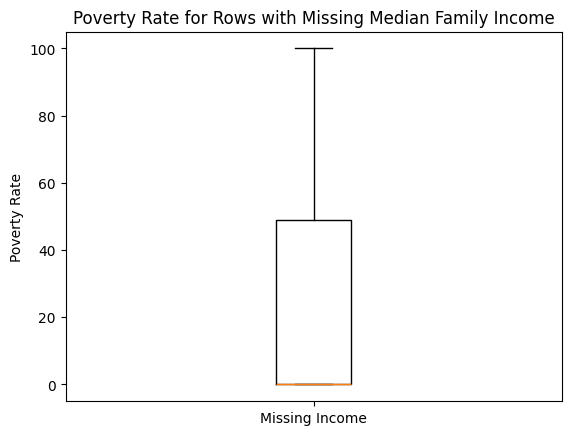

In [ ]:
plt.boxplot([missing_income['PovertyRate'].dropna()])
plt.title("Poverty Rate for Rows with Missing Median Family Income")
plt.ylabel("Poverty Rate")
plt.xticks([1], ['Missing Income'])
plt.show()

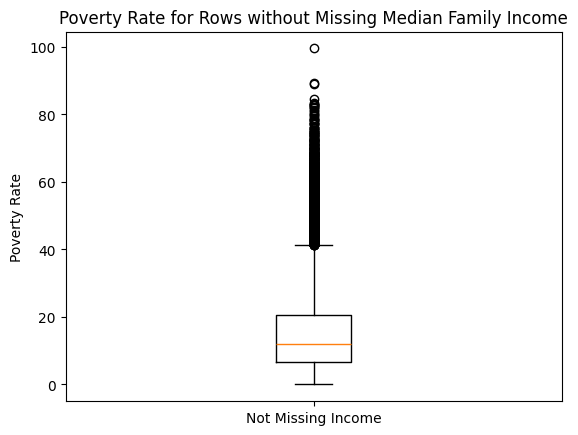

In [ ]:
plt.boxplot([not_missing_income['PovertyRate'].dropna()])
plt.title("Poverty Rate for Rows without Missing Median Family Income")
plt.ylabel("Poverty Rate")
plt.xticks([1], ['Not Missing Income'])
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(my_data)

imputer = KNNImputer(n_neighbors=5)
df_imputed_scaled = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=efa_cols+target_col)

my_data = df_imputed.copy()

In [ ]:
my_data.isnull().sum()

Pop2010               0
OHU2010               0
PCTGQTRS              0
PovertyRate           0
MedianFamilyIncome    0
TractLOWI             0
TractKids             0
TractSeniors          0
TractWhite            0
TractBlack            0
TractAsian            0
TractNHOPI            0
TractAIAN             0
TractOMultir          0
TractHispanic         0
TractHUNV             0
TractSNAP             0
LA1and10              0
dtype: int64

In [ ]:
efa_data = my_data[efa_cols].copy()

### Outlier Analysis

In [ ]:
import seaborn as sns
def outlier_plots(df, col):
  plt.figure(figsize=(3, 4))  # Adjusting the figure size for better visibility
  sns.boxplot(y=df[col], orient='v')

  # Calculate the IQR to identify outliers
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier thresholds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Outlier ID for {col}",1+outliers.index.values)
  outlier_ids = 1+outliers.index.values
  # Mark outliers with case numbers
  # Define vertical spacing for labels
  offset = 0.2  # Adjust as needed for more or less spacing

  # Loop through the outliers and mark each with a unique vertical offset
  for i in range(outliers.shape[0]):
  # Adjust the position to avoid overlap by applying an offset
    y_position = outliers[col].iloc[i] + i * offset
    plt.text(0, y_position, f'{outliers.index[i]}', color='red',
              ha='center', va='bottom', fontsize=8)

  # Add title and labels
  plt.title(f'Boxplot of {col} with Outliers Marked')
  plt.ylabel(f'{col}')
  plt.show()
  return outlier_ids

Outlier ID for Pop2010 [    5     9    20 ... 71825 72087 72364]


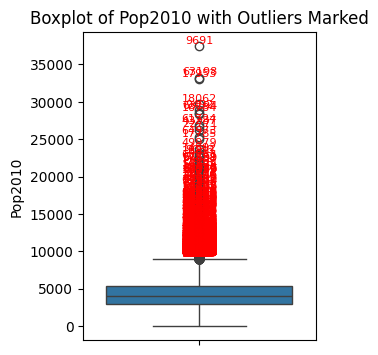

Outlier ID for OHU2010 [    5     9    20 ... 72087 72094 72364]


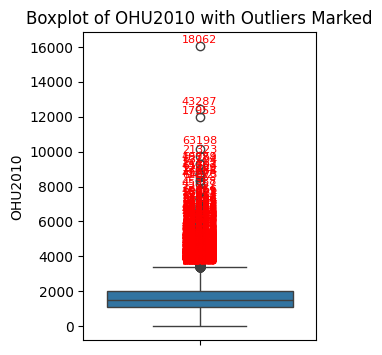

Outlier ID for PCTGQTRS [    2    15    17 ... 72511 72517 72526]


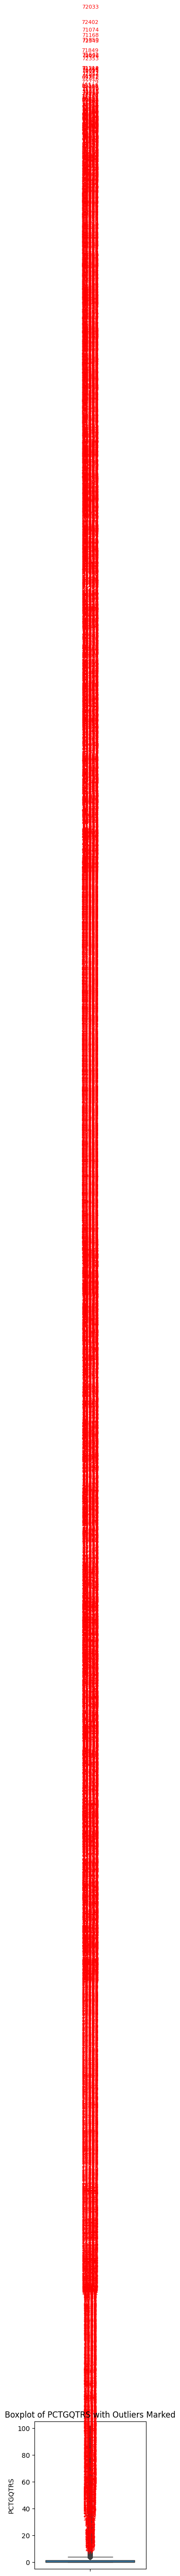

Outlier ID for PovertyRate [   66    81    82 ... 72185 72344 72403]


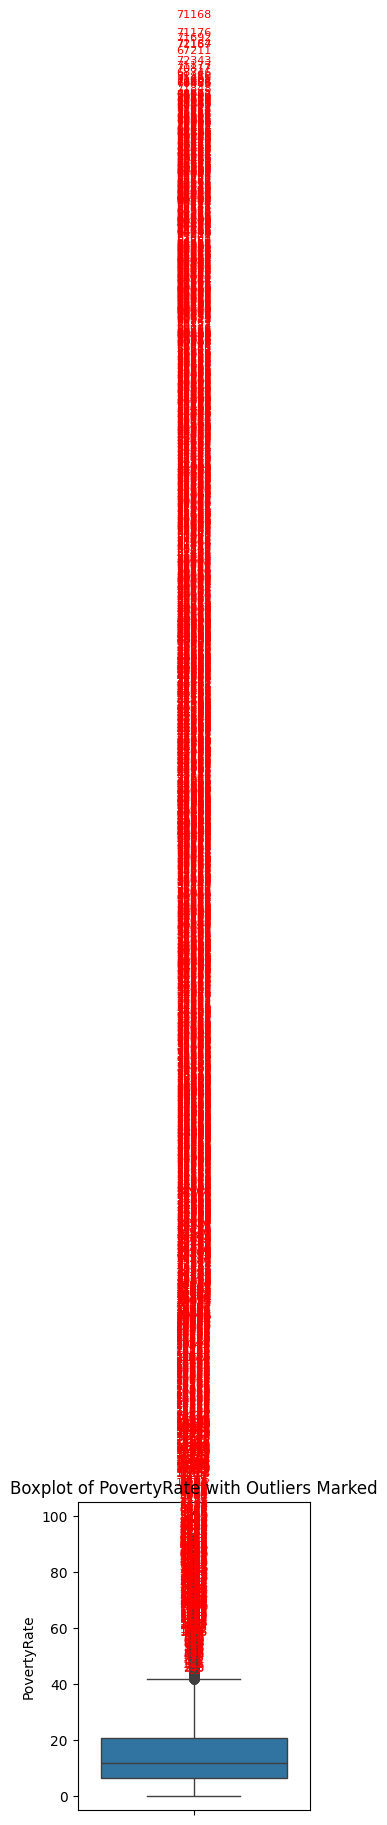

Outlier ID for MedianFamilyIncome [  463   468   470 ... 71859 71950 72297]


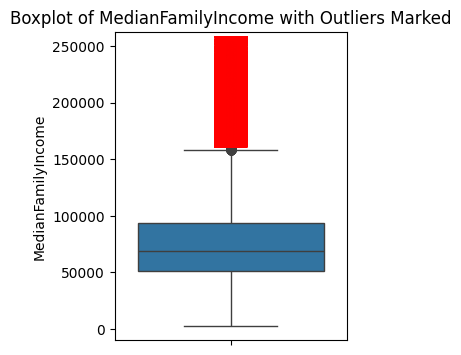

Outlier ID for TractLOWI [  407   416   434   755   822   879   882   920  1128  1168  1349  1356
  1400  1435  1456  1628  1629  1699  1743  1767  1777  1780  1785  1787
  1804  1826  1828  1830  1836  1844  1845  1848  1849  1850  1859  1868
  1873  1923  1992  1993  1994  1995  1997  2069  2083  2365  2681  2855
  2859  3342  3650  4251  4429  4538  4540  4544  4546  4661  4685  4839
  5267  5277  5281  5285  5286  5412  5418  5422  5457  5492  5509  5520
  5521  5534  5537  5540  5565  6209  6439  6565  6582  6621  6834  6910
  7037  7426  7588  8131  8428  8745  8990  9751 10008 10166 10434 10435
 11170 11310 11317 11395 11576 11849 11947 12919 13178 13179 13183 13184
 13203 13764 13966 14013 14014 14039 14060 14383 14384 14385 14412 14454
 14567 14784 14787 15188 15190 15200 15210 15231 15294 15299 15303 15304
 15695 15708 15723 15792 15797 15803 15804 15806 15807 15858 15864 15973
 16111 16124 16125 16126 16133 16135 16165 16220 16223 16224 16229 16235
 16361 16363 16364 16430 1

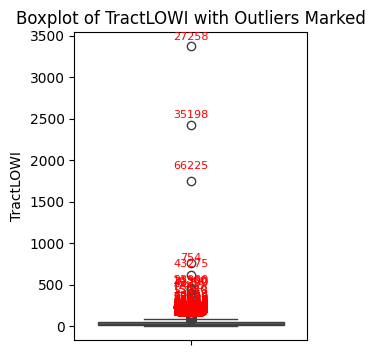

Outlier ID for TractKids [   97   106   107 ... 72344 72402 72403]


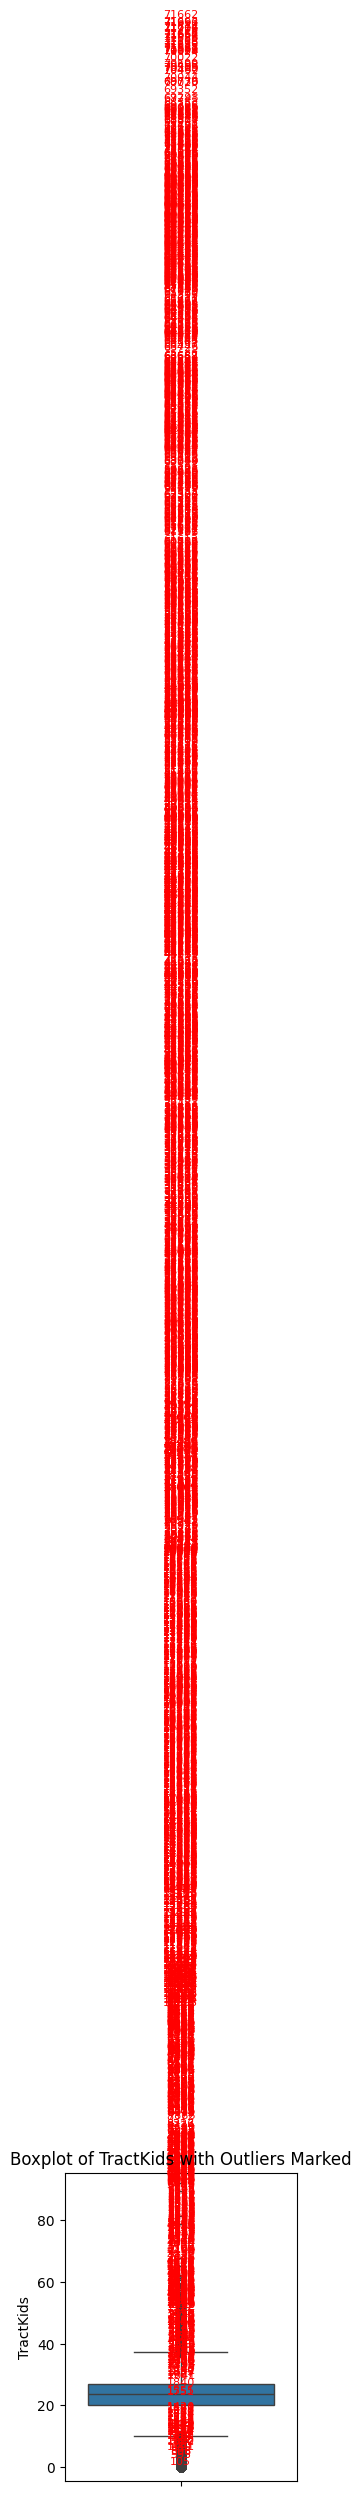

Outlier ID for TractSeniors [   39    43    85 ... 72284 72324 72336]


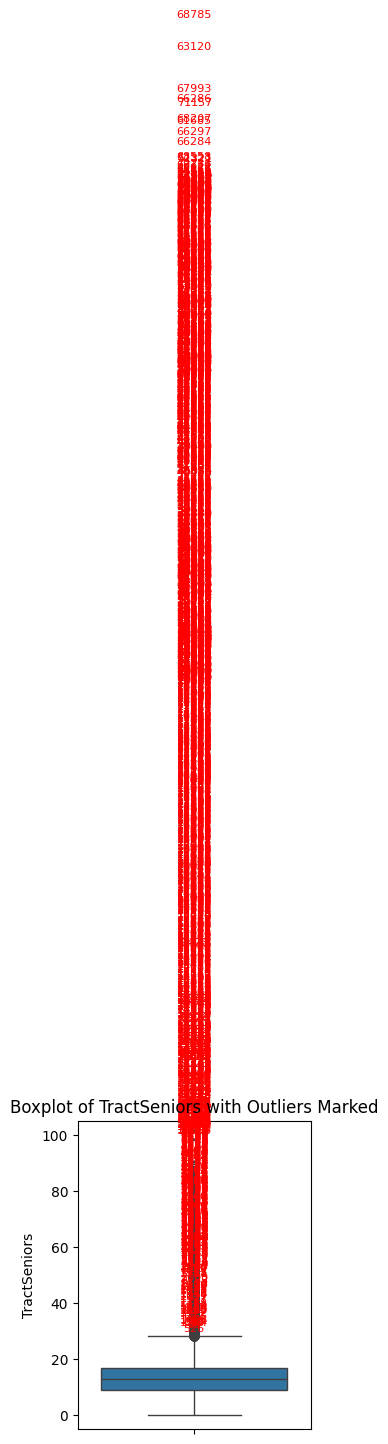

Outlier ID for TractWhite [   81   245   246 ... 71845 71846 71848]


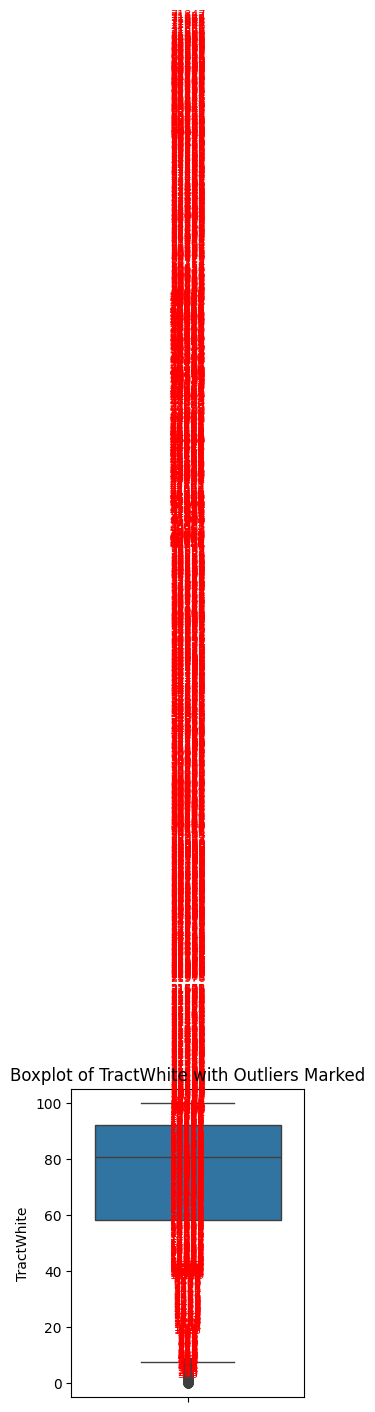

Outlier ID for TractBlack [    2    12    18 ... 71992 71993 71995]


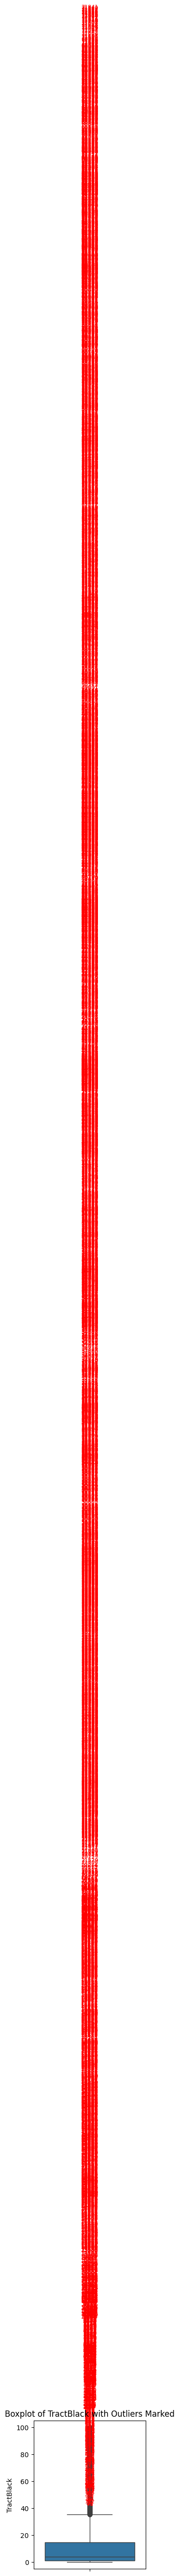

Outlier ID for TractAsian [  550   862   927 ... 72253 72283 72403]


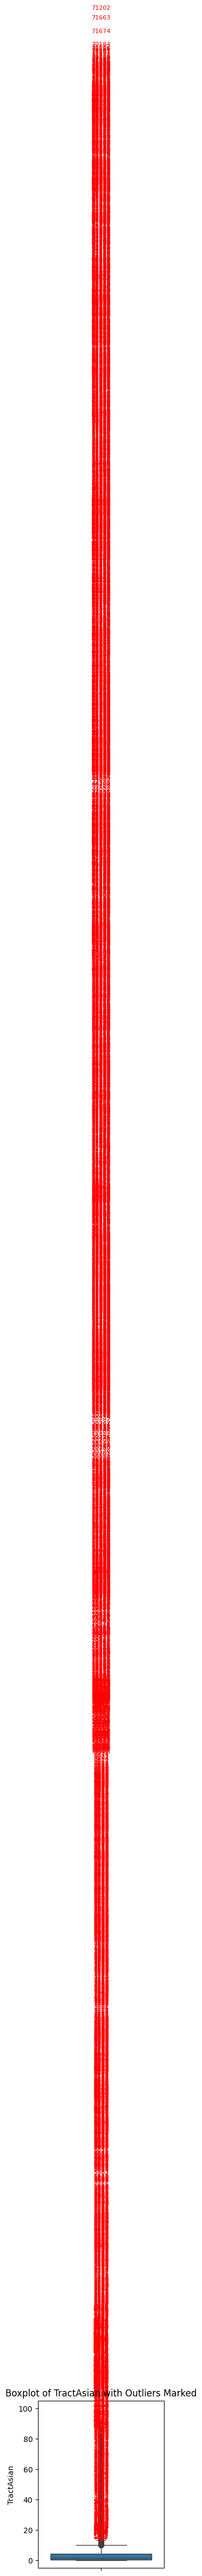

Outlier ID for TractNHOPI [   37    52    62 ... 72456 72511 72521]


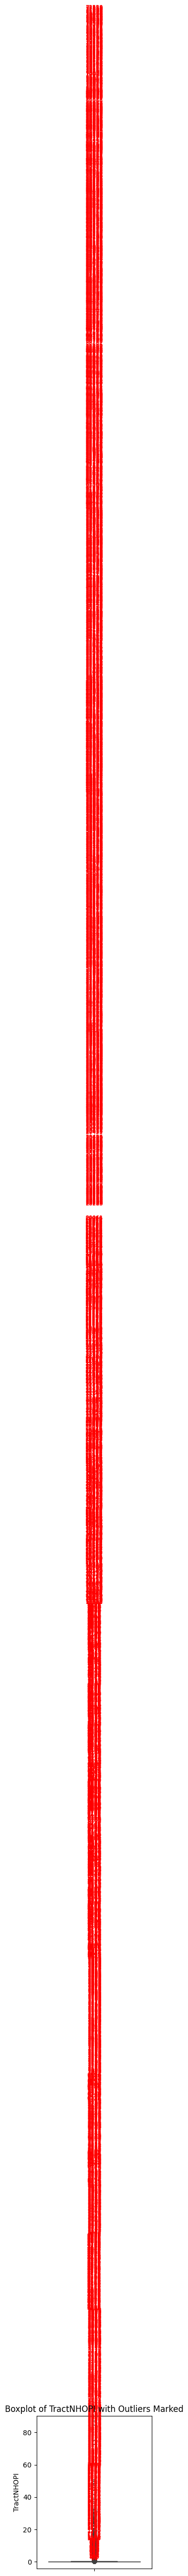

Outlier ID for TractAIAN [   13    14    44 ... 72470 72487 72501]


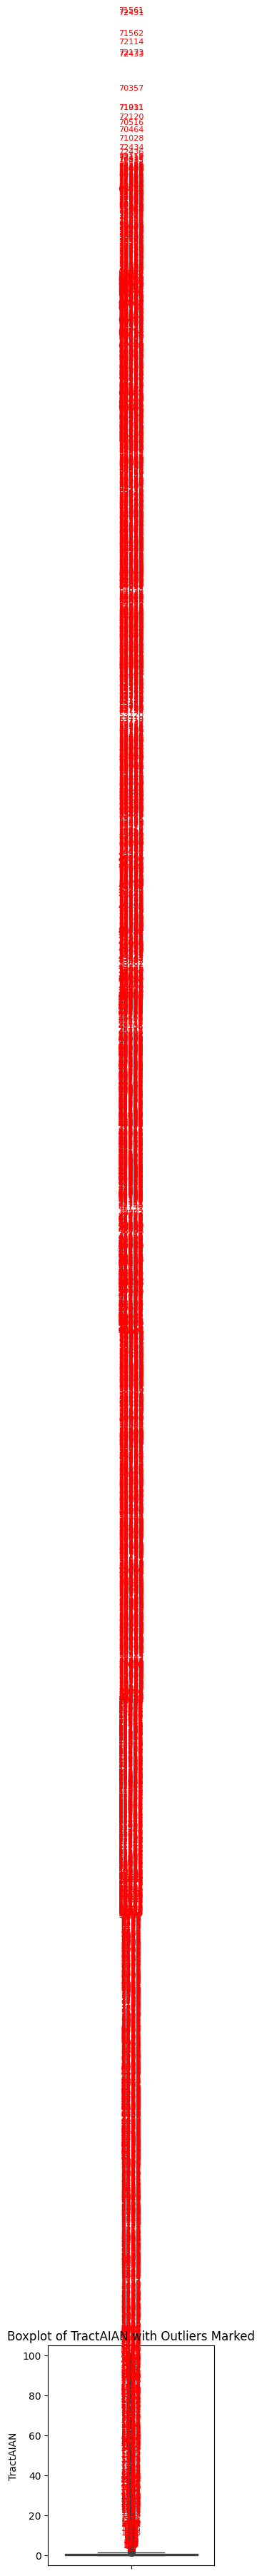

Outlier ID for TractOMultir [  262   263   268 ... 71994 71995 72060]


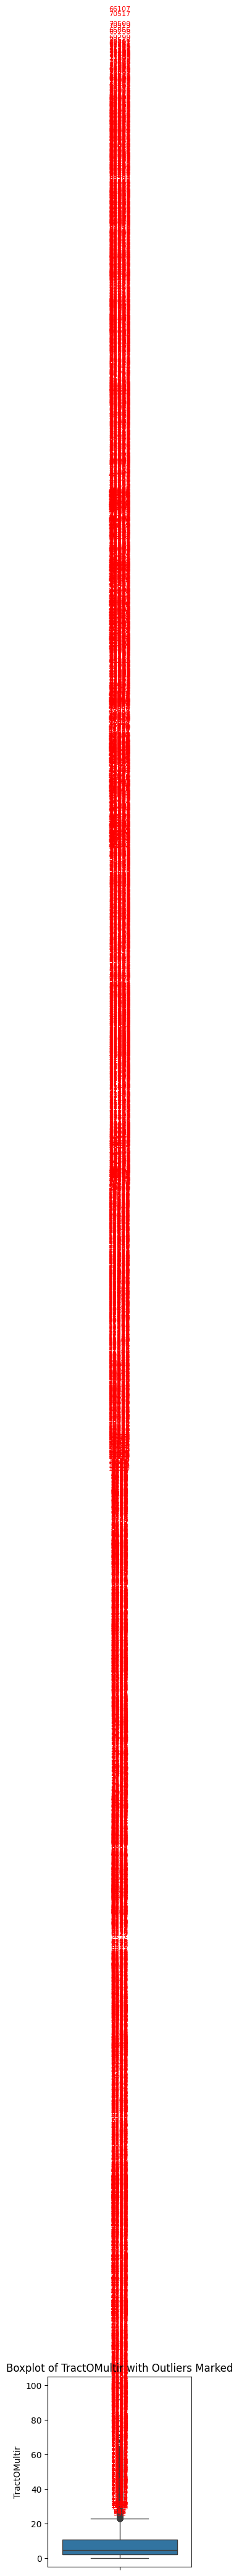

Outlier ID for TractHispanic [ 1362  1363  1370 ... 71853 71993 71994]


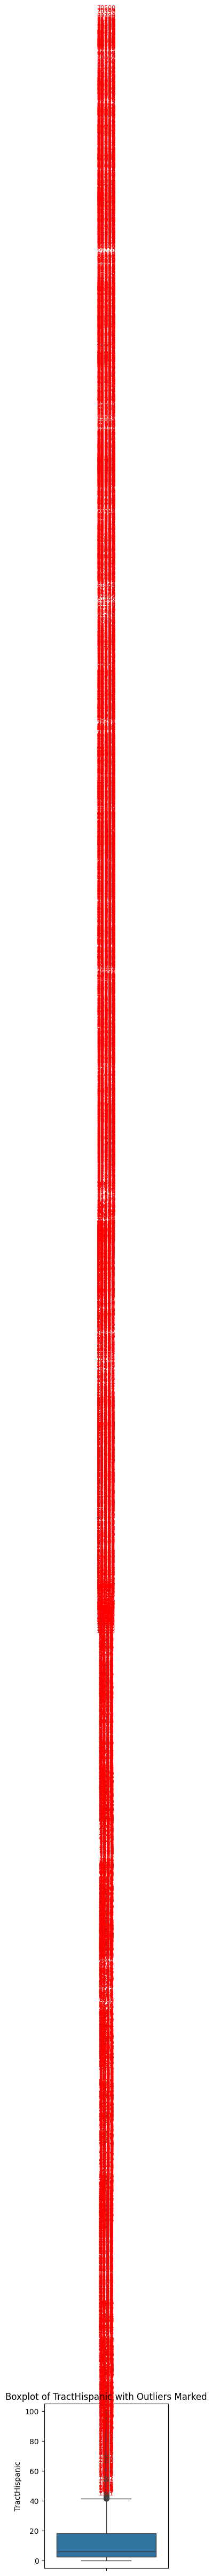

Outlier ID for TractHUNV [   81   166   169 ... 72281 72340 72452]


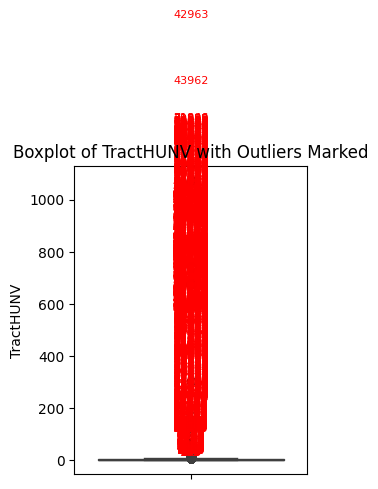

Outlier ID for TractSNAP [   66    79    82 ... 72045 72058 72060]


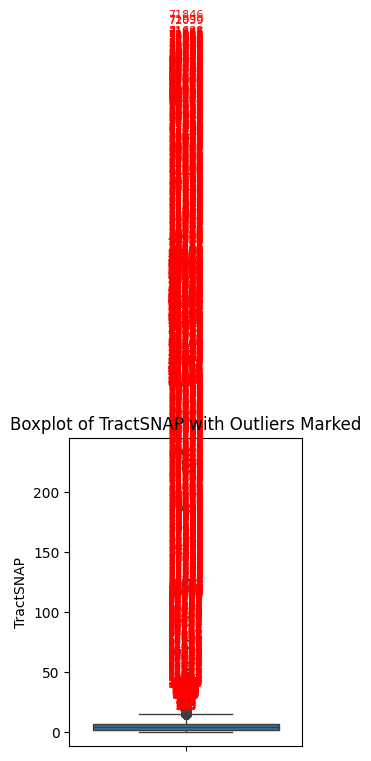

In [ ]:
outlier_ids = {}
for col in efa_cols:
  ids = outlier_plots(efa_data, col)
  outlier_ids[col] = ids

In [ ]:
efa_data.describe()

Pop2010       OHU2010      PCTGQTRS   PovertyRate  \
count  72527.000000  72527.000000  72527.000000  72527.000000   
mean    4256.683621   1609.213162      2.708293     15.183280   
std     1956.004392    725.686904      9.569567     11.919477   
min        1.000000      0.000000      0.000000      0.000000   
25%     2899.000000   1108.000000      0.000000      6.495710   
50%     4011.000000   1525.000000      0.181242     11.951336   
75%     5330.500000   2021.000000      1.565217     20.596350   
max    37452.000000  16043.000000    100.000000    100.000000   

       MedianFamilyIncome     TractLOWI     TractKids  TractSeniors  \
count        72527.000000  72527.000000  72527.000000  72527.000000   
mean         77103.510949     33.608357     23.405931     13.626351   
std          37543.076899     25.441456      6.512238      7.387703   
min           2499.000000      0.000000      0.000000      0.000000   
25%          51479.000000     19.066926     20.290496      9.075697   
50%          68917.000000     30.881946     23.620722     12.911153   
75%          94078.000000     45.315044     27.079935     16.726033   
max         250001.000000   3375.000000     90.804598    100.000000   

         TractWhite    TractBlack    TractAsian    TractNHOPI     TractAIAN  \
count  72527.000000  72527.000000  72527.000000  72527.000000  72527.000000   
mean      71.869987     13.835406      4.403122      0.164940      1.017096   
std       25.700314     22.295239      8.398228      1.008535      4.688103   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       58.282896      1.096801      0.477999      0.000000      0.192642   
50%       80.809992      3.990128      1.472157      0.030906      0.385914   
75%       92.179487     14.832166      4.312977      0.106317      0.767095   
max      100.000000    100.000000    100.000000     85.882353    100.000000   

       TractOMultir  TractHispanic     TractHUNV     TractSNAP  
count  72527.000000   72527.000000  72527.000000  72527.000000  
mean       8.709450      15.271370      3.793978      5.090445  
std       10.032666      20.827053      7.804000      4.848875  
min        0.000000       0.000000      0.000000      0.000000  
25%        2.331346       2.417443      0.917431      1.769974  
50%        4.738845       6.206897      2.023609      3.881857  
75%       10.607092      18.088880      4.280863      7.066643  
max      100.000000     100.000000   1075.000000    233.571429

In [ ]:
from collections import Counter

# Combine all outlier IDs into a single list
all_outliers = [item for sublist in outlier_ids.values() for item in sublist]

# Count frequencies of each outlier ID
outlier_frequencies = Counter(all_outliers)

# Display frequencies
print("Outlier Frequencies:")
for outlier_id, freq in outlier_frequencies.items():
    print(f"ID {outlier_id}: {freq}")

Outlier Frequencies:
ID 5: 2
ID 9: 2
ID 20: 2
ID 34: 2
ID 35: 2
ID 41: 2
ID 270: 2
ID 360: 2
ID 476: 2
ID 492: 2
ID 543: 2
ID 544: 2
ID 601: 4
ID 611: 2
ID 631: 2
ID 693: 2
ID 699: 2
ID 703: 4
ID 708: 2
ID 709: 2
ID 711: 1
ID 839: 2
ID 843: 2
ID 848: 2
ID 1012: 2
ID 1013: 2
ID 1115: 2
ID 1186: 3
ID 1220: 4
ID 1227: 4
ID 1229: 4
ID 1237: 5
ID 1258: 3
ID 1262: 3
ID 1278: 3
ID 1388: 3
ID 1515: 1
ID 1991: 3
ID 2136: 2
ID 2372: 3
ID 2376: 3
ID 2448: 4
ID 2593: 1
ID 2687: 3
ID 2689: 2
ID 2695: 3
ID 2696: 1
ID 2717: 4
ID 2763: 3
ID 2764: 3
ID 2778: 1
ID 2806: 3
ID 3019: 2
ID 3071: 2
ID 3400: 2
ID 3505: 4
ID 3506: 6
ID 3513: 2
ID 3542: 2
ID 3867: 5
ID 3975: 2
ID 3993: 2
ID 3995: 3
ID 3996: 3
ID 4123: 4
ID 4129: 3
ID 4192: 5
ID 4264: 4
ID 4321: 3
ID 4488: 4
ID 4492: 4
ID 4500: 3
ID 4502: 3
ID 4515: 2
ID 4536: 3
ID 4537: 4
ID 4555: 4
ID 4558: 6
ID 4585: 5
ID 4587: 4
ID 4589: 2
ID 4590: 4
ID 4591: 4
ID 4601: 2
ID 4606: 2
ID 4623: 5
ID 4626: 3
ID 4671: 3
ID 4674: 1
ID 4690: 5
ID 4691: 3
ID 4714: 5

## EFA Assumption Tests

In [ ]:
import numpy as np
from scipy.stats import pearsonr


# Calculate the correlation matrix with pairwise handling of missing data
correlation_matrix = efa_data.corr(method='pearson', min_periods=1)
def highlight_cells(val):
    """Highlights cells with absolute correlation >= 0.3."""
    color = 'background-color: yellow' if abs(val) >= 0.3 else ''
    return color

# Apply the conditional formatting
correlation_matrix_style = correlation_matrix.style.applymap(highlight_cells)

# To save the styled DataFrame to an HTML file
correlation_matrix_style.to_html("correlation_matrix.html")

# Display the styled DataFrame
correlation_matrix_style

/tmp/ipython-input-1743355965.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  correlation_matrix_style = correlation_matrix.style.applymap(highlight_cells)


In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 329.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=fe28462ca55d49e5eb6f74e7d673bc5622ef20cb8543d8bfdd6ac659f09400bc
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [ ]:
# Standardize the data
scaler = StandardScaler()
efa_data_scaled = scaler.fit_transform(efa_data)
efa_data_scaled_df = pd.DataFrame(efa_data_scaled, columns=efa_data.columns)

In [ ]:
efa_data_scaled_df.head()

Pop2010   OHU2010  PCTGQTRS  PovertyRate  MedianFamilyIncome  TractLOWI  \
0 -1.198719 -1.262555 -0.283013    -0.322737            0.110447  -0.385644   
1 -1.066817 -1.193654  0.588612     0.225977           -0.748572   0.131682   
2 -0.451783 -0.486733 -0.283013    -0.011515           -0.386079   0.200889   
3  0.066113  0.155422 -0.283013    -1.035126           -0.173043  -0.494744   
4  3.327887  3.407535 -0.107328    -0.002717            0.512228  -0.502472   

   TractKids  TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  \
0   0.477689     -0.279896    0.504381   -0.111506   -0.437108   -0.163546   
1   0.694134     -0.509580   -1.204209    1.894926   -0.496859   -0.163546   
2   0.475825     -0.082737    0.175143    0.239799   -0.464282   -0.016563   
3  -0.040557      0.945454    0.828403   -0.423189   -0.475428   -0.073118   
4   0.915868     -0.428756    0.335569   -0.021881   -0.196915   -0.080656   

   TractAIAN  TractOMultir  TractHispanic  TractHUNV  TractSNAP  
0  -0.060767     -0.633524      -0.622758  -0.445950   0.050380  
1  -0.167805     -0.615482      -0.567302   0.039391   0.432783  
2  -0.147390     -0.522370      -0.609407  -0.110060   0.001830  
3  -0.163457     -0.699945      -0.640200  -0.424808  -0.589020  
4  -0.121851     -0.581107      -0.574927  -0.212408  -0.400434

In [ ]:
efa_data_scaled_df.dtypes

Pop2010               float64
OHU2010               float64
PCTGQTRS              float64
PovertyRate           float64
MedianFamilyIncome    float64
TractLOWI             float64
TractKids             float64
TractSeniors          float64
TractWhite            float64
TractBlack            float64
TractAsian            float64
TractNHOPI            float64
TractAIAN             float64
TractOMultir          float64
TractHispanic         float64
TractHUNV             float64
TractSNAP             float64
dtype: object

In [ ]:
# create subset of data for assumptions testing

efa_data_subset = efa_data_scaled_df.sample(n=5000, random_state=1)

In [ ]:
low_corr_vars = [
    'PCTGQTRS',
    'TractAIAN',
    'TractAsian',
    'TractNHOPI'
]

efa_filtered = efa_data_subset.drop(columns=low_corr_vars)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(efa_filtered)
print(f"Bartlett’s Test chi-square: {chi_square_value}")
print(f"Bartlett’s Test p-value: {p_value}")

kmo_all, kmo_model = calculate_kmo(efa_filtered)
print(f"KMO Measure: {kmo_model}")

Bartlett’s Test chi-square: 51322.410056385976
Bartlett’s Test p-value: 0.0
KMO Measure: 0.6791857947692076


In [ ]:
kmo_per_variable = pd.Series(kmo_all, index=efa_filtered.columns).sort_values()

print(kmo_per_variable)

OHU2010               0.456308
Pop2010               0.465762
TractOMultir          0.560674
TractBlack            0.585294
TractWhite            0.623450
TractHUNV             0.639163
TractKids             0.651421
TractHispanic         0.673449
TractSeniors          0.686382
TractLOWI             0.813134
TractSNAP             0.832115
MedianFamilyIncome    0.848801
PovertyRate           0.858634
dtype: float64


In [ ]:
efa_data2 = efa_data_scaled_df.drop(columns=low_corr_vars)

In [ ]:
efa_cols2 = (efa_data2.columns).tolist()
efa_cols2

['Pop2010',
 'OHU2010',
 'PovertyRate',
 'MedianFamilyIncome',
 'TractLOWI',
 'TractKids',
 'TractSeniors',
 'TractWhite',
 'TractBlack',
 'TractOMultir',
 'TractHispanic',
 'TractHUNV',
 'TractSNAP']

## Perform EFA

In [ ]:
# Initialize the factor analyzer with criteria: eigenvalues >= 1, max 25 iterations
fa = FactorAnalyzer(n_factors=len(efa_cols2), method='principal', rotation=None)
fa.fit(efa_data2)

# Get eigenvalues and plot them to visualize
eigenvalues, _ = fa.get_eigenvalues()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Set the number of factors to the count of eigenvalues >= 1
n_factors = sum(eigenvalues >= 1)

# Re-run factor analysis with the selected number of factors
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation=None)
fa.fit(efa_data2)

# Print initial communalities, factor loadings, and variance explained by each factor
print("Initial Communalities:\n", fa.get_communalities())
print("\nFactor Loadings:\n", pd.DataFrame(fa.loadings_, index=efa_cols2))
print("\nVariance Explained by Each Factor:\n", fa.get_factor_variance())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Initial Communalities:
 [0.96160665 0.96269185 0.74245297 0.76489379 0.69056037 0.66856374
 0.57350262 0.86267326 0.88807547 0.91151368 0.89656022 0.75304832
 0.7824287 ]

Factor Loadings:
                            0         1         2         3         4
Pop2010            -0.165924  0.728141  0.632342  0.062470  0.011298
OHU2010            -0.272107  0.533330  0.758216  0.159080  0.063340
PovertyRate         0.803311 -0.163311  0.128278  0.160455 -0.168145
MedianFamilyIncome -0.695235  0.106328 -0.105732 -0.310187  0.403536
TractLOWI           0.730612 -0.080059  0.129915  0.337136 -0.140776
TractKids           0.359392  0.530596 -0.100715 -0.295199 -0.400728
TractSeniors       -0.351322 -0.489596  0.117516  0.438193  0.067443
TractWhite         -0.746619 -0.056710 -0.070589  0.478104 -0.261631
TractBlack          0.613196 -0.263248  0.309413 -0.585345  0.066338
TractOMultir        0.532319  0.583206 -0.427322  0.193877  0.260439
TractHispanic       0.482257  0.592085 -0.426523  0

In [ ]:
# Unrotated factor loadings
# Factor Loadings
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, columns=[f"Factor{i+1}" for i in range(loadings.shape[1])], index=efa_cols2)

# Set loadings with absolute values <= 0.3 to NaN or blank
loadings_df = loadings_df.applymap(lambda x: x if abs(x) > 0.3 else " ")

print("\nFactor Loadings (Only values > 0.3 shown):")
print(loadings_df)


Factor Loadings (Only values > 0.3 shown):
                     Factor1   Factor2   Factor3   Factor4   Factor5
Pop2010                       0.728141  0.632342                    
OHU2010                        0.53333  0.758216                    
PovertyRate         0.803311                                        
MedianFamilyIncome -0.695235                     -0.310187  0.403536
TractLOWI           0.730612                      0.337136          
TractKids           0.359392  0.530596                     -0.400728
TractSeniors       -0.351322 -0.489596            0.438193          
TractWhite         -0.746619                      0.478104          
TractBlack          0.613196            0.309413 -0.585345          
TractOMultir        0.532319  0.583206 -0.427322                    
TractHispanic       0.482257  0.592085 -0.426523                    
TractHUNV           0.413777                                0.654721
TractSNAP           0.784451                               

/tmp/ipython-input-1253553376.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loadings_df = loadings_df.applymap(lambda x: x if abs(x) > 0.3 else " ")


### Varimax Rotation

In [ ]:
# Initialize the factor analyzer with criteria: eigenvalues >= 1, max 25 iterations
fa = FactorAnalyzer(n_factors=len(efa_cols2), method='principal', rotation='varimax')
fa.fit(efa_data2)

# Get eigenvalues and plot them to visualize
eigenvalues, _ = fa.get_eigenvalues()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Set the number of factors to the count of eigenvalues >= 1
n_factors = sum(eigenvalues >= 1)

# Re-run factor analysis with the selected number of factors
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation='varimax')
fa.fit(efa_data2)

# Print initial communalities, factor loadings, and variance explained by each factor
print("Initial Communalities:\n", fa.get_communalities())
print("\nFactor Loadings:\n", pd.DataFrame(fa.loadings_, index=efa_cols2))
print("\nVariance Explained by Each Factor:\n", fa.get_factor_variance())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Initial Communalities:
 [0.96160665 0.96269185 0.74245297 0.76489379 0.69056037 0.66856374
 0.57350262 0.86267326 0.88807547 0.91151368 0.89656022 0.75304832
 0.7824287 ]

Factor Loadings:
                            0         1         2         3         4
Pop2010            -0.090231  0.102828  0.960162  0.000086 -0.144844
OHU2010            -0.075986 -0.082091  0.970013 -0.086203  0.042697
PovertyRate         0.802986  0.121179 -0.103641  0.267700  0.024021
MedianFamilyIncome -0.857237 -0.078467  0.064487 -0.021787  0.138739
TractLOWI           0.796780  0.199319 -0.016365  0.100754  0.074532
TractKids           0.160351  0.307259  0.130139  0.272268 -0.676296
TractSeniors        0.028788 -0.372301 -0.093573 -0.473279  0.448684
TractWhite         -0.264511 -0.265548  0.067151 -0.846733 -0.026915
TractBlack          0.319412 -0.207114 -0.083784  0.857717  0.021379
TractOMultir        0.154878  0.934089 -0.010656  0.103690 -0.064338
TractHispanic       0.171580  0.928719  0.012812 -0

In [ ]:
# Factor Loadings
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, columns=[f"Factor{i+1}" for i in range(loadings.shape[1])], index=efa_cols2)

# Set loadings with absolute values <= 0.3 to NaN or blank
loadings_df = loadings_df.applymap(lambda x: x if abs(x) > 0.3 else " ")

print("\nFactor Loadings (Only values > 0.3 shown):")
print(loadings_df)


Factor Loadings (Only values > 0.3 shown):
                     Factor1   Factor2   Factor3   Factor4   Factor5
Pop2010                                 0.960162                    
OHU2010                                 0.970013                    
PovertyRate         0.802986                                        
MedianFamilyIncome -0.857237                                        
TractLOWI            0.79678                                        
TractKids                     0.307259                     -0.676296
TractSeniors                 -0.372301           -0.473279  0.448684
TractWhite                                       -0.846733          
TractBlack          0.319412                      0.857717          
TractOMultir                  0.934089                              
TractHispanic                 0.928719                              
TractHUNV                                         0.338205  0.745244
TractSNAP           0.804919                      0.312854 

/tmp/ipython-input-1009500272.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loadings_df = loadings_df.applymap(lambda x: x if abs(x) > 0.3 else " ")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


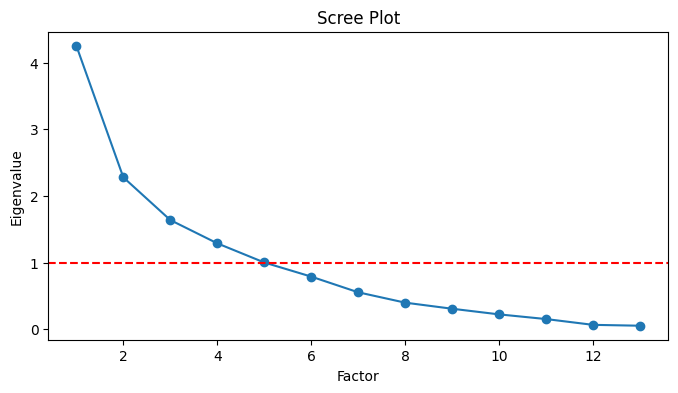

Proportion of Total Variance Explained by Each Factor:
      Factor  Eigenvalue  Proportion of Variance (%)  Cumulative Variance (%)
0    Factor1    4.252577                   32.712129                32.712129
1    Factor2    2.278499                   17.526917                50.239046
2    Factor3    1.637879                   12.599071                62.838117
3    Factor4    1.288407                    9.910820                72.748938
4    Factor5    1.001210                    7.701613                80.450551
5    Factor6    0.789189                    6.070686                86.521237
6    Factor7    0.553844                    4.260339                90.781576
7    Factor8    0.398496                    3.065350                93.846926
8    Factor9    0.307139                    2.362610                96.209536
9   Factor10    0.222505                    1.711575                97.921111
10  Factor11    0.152428                    1.172522                99.093632
11  Facto

In [ ]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax", method="principal")
fa.fit(efa_data2)

# Eigenvalues (Scree Plot)
eigenvalues, _ = fa.get_eigenvalues()

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

n_eigen = len(eigenvalues)

# Proportion of Variance Explained
total_variance = sum(eigenvalues)
variance_explained = [(eig / total_variance) * 100 for eig in eigenvalues[:25]]
cumulative_variance_explained = np.cumsum(variance_explained)

# Creating the variance explained table
variance_df = pd.DataFrame({
    "Factor": [f"Factor{i+1}" for i in range(n_eigen)],
    "Eigenvalue": eigenvalues[:n_eigen],
    "Proportion of Variance (%)": variance_explained,
    "Cumulative Variance (%)": cumulative_variance_explained
})

print("Proportion of Total Variance Explained by Each Factor:")
print(variance_df)

In [ ]:
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# Factor Analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax", method="principal")
fa.fit(efa_data2)

# Eigenvalues (Scree Plot)
eigenvalues, _ = fa.get_eigenvalues()
# Set parameters for parallel analysis
num_vars = efa_data2.shape[1]
num_simulations = 100
random_eigenvalues = np.zeros((num_simulations, num_vars))

# Perform simulations
for i in range(num_simulations):
    # Generate random data with the same shape and compute eigenvalues
    random_data = np.random.normal(size=efa_data2.shape)
    fa.fit(random_data)
    random_eigenvalues[i, :] = fa.get_eigenvalues()[0]

# Calculate the mean of each eigenvalue position from the simulations
mean_random_eigenvalues = random_eigenvalues.mean(axis=0)

# Display actual eigenvalues and mean random eigenvalues
print("Actual Eigenvalues:\n", eigenvalues)
print("Mean Random Eigenvalues (Parallel Analysis):\n", mean_random_eigenvalues)

# Determine the number of factors to retain (where actual eigenvalue > mean random eigenvalue)
num_factors = sum(eigenvalues > mean_random_eigenvalues)
print(f"Number of factors to retain based on parallel analysis: {num_factors}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Actual Eigenvalues:
 [4.25257678 2.27849921 1.63787927 1.28840666 1.00120971 0.78918916
 0.55384401 0.39849552 0.3071393  0.22250472 0.15242781 0.06548692
 0.0523409 ]
Mean Random Eigenvalues (Parallel Analysis):
 [1.02196385 1.0170034  1.01283457 1.00945623 1.00621832 1.00311168
 1.00003027 0.99706864 0.99380256 0.99044617 0.98696644 0.98290233
 0.97819554]
Number of factors to retain based on parallel analysis: 4


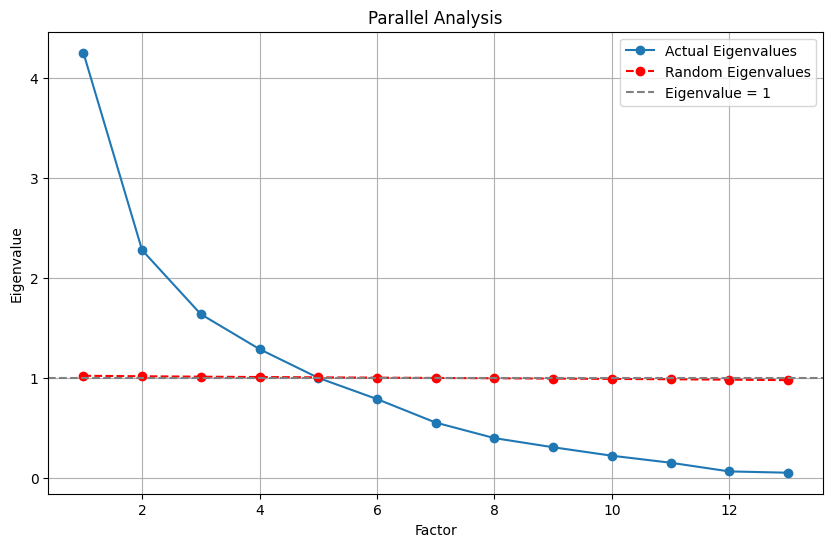

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label="Actual Eigenvalues")
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='o', linestyle='--', color='red', label="Random Eigenvalues")
plt.axhline(y=1, color='gray', linestyle='--', label="Eigenvalue = 1")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.title("Parallel Analysis")
plt.legend()
plt.grid()
plt.show()

In [ ]:
variables_order = [
    "Pop2010",
    "OHU2010",
    "PovertyRate",
    "MedianFamilyIncome",
    "TractLOWI",
    "TractKids",
    "TractSeniors",
    "TractWhite",
    "TractBlack",
    "TractOMultir",
    "TractHispanic",
    "TractHUNV",
    "TractSNAP"
]


In [ ]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax", method="principal")
fa.fit(efa_data2)

# Step 1: Get loadings as a numeric DataFrame
loadings = fa.loadings_
loading_df = pd.DataFrame(loadings, columns=[f"Factor{i+1}" for i in range(loadings.shape[1])], index=efa_cols2)

# Step 2: Reindex to your chosen variable order
loading_df = loading_df.reindex(variables_order)

# Step 3: Calculate "note" before modifying the values
notes = []
for i, row in loading_df.iterrows():
    sorted_loadings = row[["Factor1", "Factor2", "Factor3", "Factor4", "Factor5"]].abs().sort_values(ascending=False)
    v1, v2 = sorted_loadings.iloc[0], sorted_loadings.iloc[1]
    note_value = np.sqrt(v1) / np.sqrt(v2)
    notes.append(note_value)

# Step 4: Add notes and apply threshold
loading_df["note"] = notes
loading_df["note"] = loading_df["note"].apply(lambda x: x if x < 1.5 else " ")

# Step 5: (Optional) Create a pretty version with blanked small values
pretty_loading_df = loading_df.copy()
for col in ["Factor1", "Factor2", "Factor3", "Factor4",  "Factor5"]:
    pretty_loading_df[col] = pretty_loading_df[col].apply(lambda x: x if abs(x) > 0.3 else " ")

# Step 6: Build your summary table
summary_df = pd.DataFrame({
    "Communalities": fa.get_communalities(),  # or loading_df["Extraction Communalities"] if precomputed
    "Factor1": pretty_loading_df["Factor1"],
    "Factor2": pretty_loading_df["Factor2"],
    "Factor3": pretty_loading_df["Factor3"],
    "Factor4": pretty_loading_df["Factor4"],
    "Factor5": pretty_loading_df["Factor5"],
    "note": pretty_loading_df["note"]
}, index=variables_order)

summary_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Communalities   Factor1   Factor2   Factor3   Factor4  \
Pop2010                  0.961607                      0.960162             
OHU2010                  0.962692                      0.970013             
PovertyRate              0.742453  0.802986                                 
MedianFamilyIncome       0.764894 -0.857237                                 
TractLOWI                0.690560   0.79678                                 
TractKids                0.668564            0.307259                       
TractSeniors             0.573503           -0.372301           -0.473279   
TractWhite               0.862673                               -0.846733   
TractBlack               0.888075  0.319412                      0.857717   
TractOMultir             0.911514            0.934089                       
TractHispanic            0.896560            0.928719                       
TractHUNV                0.753048                                0.338205   
TractSNAP                0.782429  0.804919                      0.312854   

                     Factor5      note  
Pop2010                                 
OHU2010                                 
PovertyRate                             
MedianFamilyIncome                      
TractLOWI                               
TractKids          -0.676296  1.483597  
TractSeniors        0.448684  1.027042  
TractWhite                              
TractBlack                              
TractOMultir                            
TractHispanic                           
TractHUNV           0.745244  1.484428  
TractSNAP

### Remove variables based on theory

In [ ]:
# Remove seniors/kids
efa_data5 = efa_data2.drop(['TractSeniors', 'TractKids', 'TractHUNV'], axis=1)
# Calculate the KMO measure
chi_square_value, p_value = calculate_bartlett_sphericity(efa_data5)
print(f"Bartlett’s Test chi-square: {chi_square_value}")
print(f"Bartlett’s Test p-value: {p_value}")

# Calculate the KMO measure
kmo_all, kmo_model = calculate_kmo(efa_data5)
print(f"KMO Measure: {kmo_model}")

Bartlett’s Test chi-square: 561568.741988478
Bartlett’s Test p-value: 0.0
KMO Measure: 0.6521058567203795


In [ ]:
efa_cols5 = efa_data5.columns

In [ ]:
# Initialize the factor analyzer with criteria: eigenvalues >= 1, max 25 iterations
fa = FactorAnalyzer(n_factors=len(efa_cols5), method='principal', rotation='varimax')
fa.fit(efa_data5)

# Get eigenvalues and plot them to visualize
eigenvalues, _ = fa.get_eigenvalues()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Set the number of factors to the count of eigenvalues >= 1
n_factors = sum(eigenvalues >= 1)

# Re-run factor analysis with the selected number of factors
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation='varimax')
fa.fit(efa_data5)

# Print initial communalities, factor loadings, and variance explained by each factor
print("Initial Communalities:\n", fa.get_communalities())
print("\nFactor Loadings:\n", pd.DataFrame(fa.loadings_, index=efa_cols5))
print("\nVariance Explained by Each Factor:\n", fa.get_factor_variance())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Initial Communalities:
 [0.95885212 0.95994674 0.75578238 0.69970888 0.70422298 0.96023721
 0.95296517 0.94204244 0.91993065 0.76247591]

Factor Loadings:
                            0         1         2         3
Pop2010            -0.090167  0.968506  0.111562 -0.016514
OHU2010            -0.070961  0.970158 -0.086531 -0.078845
PovertyRate         0.809056 -0.099063  0.129730  0.273071
MedianFamilyIncome -0.820439  0.045891 -0.130800 -0.085872
TractLOWI           0.816888 -0.030023  0.174835  0.073814
TractWhite         -0.235884  0.043294 -0.316692 -0.895783
TractBlack          0.286449 -0.063080 -0.154107  0.918251
TractOMultir        0.143294  0.002516  0.954065  0.106124
TractHispanic       0.160323  0.023580  0.945331 -0.004478
TractSNAP           0.822663 -0.069961 -0.006640  0.284188

Variance Explained by Each Factor:
 (array([2.86886857, 1.90334146, 2.01241797, 1.83153648]), array([0.28688686, 0.19033415, 0.2012418 , 0.18315365]), array([0.28688686, 0.477221  , 0.6784628 , 

In [ ]:
# Factor Loadings
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, columns=[f"Factor{i+1}" for i in range(loadings.shape[1])], index=efa_cols5)

# Set loadings with absolute values <= 0.3 to NaN or blank
loadings_df = loadings_df.applymap(lambda x: x if abs(x) > 0.3 else " ")

print("\nFactor Loadings (Only values > 0.3 shown):")
print(loadings_df)


Factor Loadings (Only values > 0.3 shown):
                     Factor1   Factor2   Factor3   Factor4
Pop2010                       0.968506                    
OHU2010                       0.970158                    
PovertyRate         0.809056                              
MedianFamilyIncome -0.820439                              
TractLOWI           0.816888                              
TractWhite                             -0.316692 -0.895783
TractBlack                                        0.918251
TractOMultir                            0.954065          
TractHispanic                           0.945331          
TractSNAP           0.822663                              


/tmp/ipython-input-3587218276.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loadings_df = loadings_df.applymap(lambda x: x if abs(x) > 0.3 else " ")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


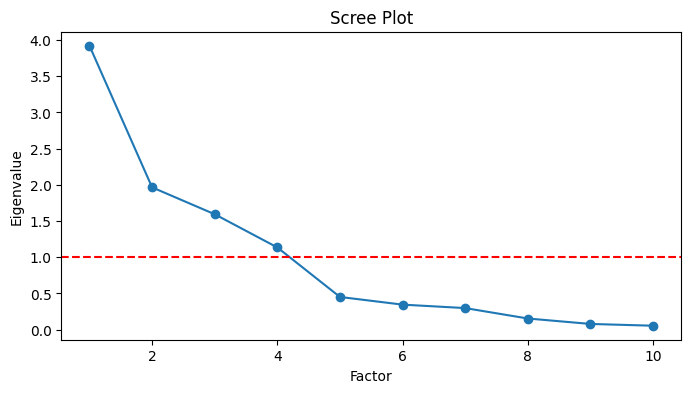

Proportion of Total Variance Explained by Each Factor:
     Factor  Eigenvalue  Proportion of Variance (%)  Cumulative Variance (%)
0   Factor1    3.921169                   39.211695                39.211695
1   Factor2    1.965438                   19.654376                58.866071
2   Factor3    1.594068                   15.940683                74.806754
3   Factor4    1.135489                   11.354891                86.161645
4   Factor5    0.451805                    4.518049                90.679694
5   Factor6    0.345826                    3.458262                94.137956
6   Factor7    0.298135                    2.981352                97.119307
7   Factor8    0.154268                    1.542681                98.661988
8   Factor9    0.079170                    0.791696                99.453684
9  Factor10    0.054632                    0.546316               100.000000


In [ ]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax", method="principal")
fa.fit(efa_data5)

# Eigenvalues (Scree Plot)
eigenvalues, _ = fa.get_eigenvalues()

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

n_eigen = len(eigenvalues)

# Proportion of Variance Explained
total_variance = sum(eigenvalues)
variance_explained = [(eig / total_variance) * 100 for eig in eigenvalues[:25]]
cumulative_variance_explained = np.cumsum(variance_explained)

# Creating the variance explained table
variance_df = pd.DataFrame({
    "Factor": [f"Factor{i+1}" for i in range(n_eigen)],
    "Eigenvalue": eigenvalues[:n_eigen],
    "Proportion of Variance (%)": variance_explained,
    "Cumulative Variance (%)": cumulative_variance_explained
})

print("Proportion of Total Variance Explained by Each Factor:")
print(variance_df)

In [ ]:
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# Factor Analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax", method="principal")
fa.fit(efa_data5)

# Eigenvalues (Scree Plot)
eigenvalues, _ = fa.get_eigenvalues()
# Set parameters for parallel analysis
num_vars = efa_data5.shape[1]
num_simulations = 100
random_eigenvalues = np.zeros((num_simulations, num_vars))

# Perform simulations
for i in range(num_simulations):
    # Generate random data with the same shape and compute eigenvalues
    random_data = np.random.normal(size=efa_data5.shape)
    fa.fit(random_data)
    random_eigenvalues[i, :] = fa.get_eigenvalues()[0]

# Calculate the mean of each eigenvalue position from the simulations
mean_random_eigenvalues = random_eigenvalues.mean(axis=0)

# Display actual eigenvalues and mean random eigenvalues
print("Actual Eigenvalues:\n", eigenvalues)
print("Mean Random Eigenvalues (Parallel Analysis):\n", mean_random_eigenvalues)

# Determine the number of factors to retain (where actual eigenvalue > mean random eigenvalue)
num_factors = sum(eigenvalues > mean_random_eigenvalues)
print(f"Number of factors to retain based on parallel analysis: {num_factors}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Actual Eigenvalues:
 [3.92116947 1.96543763 1.59406831 1.13548906 0.45180491 0.34582618
 0.29813516 0.1542681  0.07916963 0.05463156]
Mean Random Eigenvalues (Parallel Analysis):
 [1.01878386 1.01304322 1.00886593 1.00520142 1.00155024 0.99817773
 0.99461885 0.99098445 0.98717715 0.98159713]
Number of factors to retain based on parallel analysis: 4


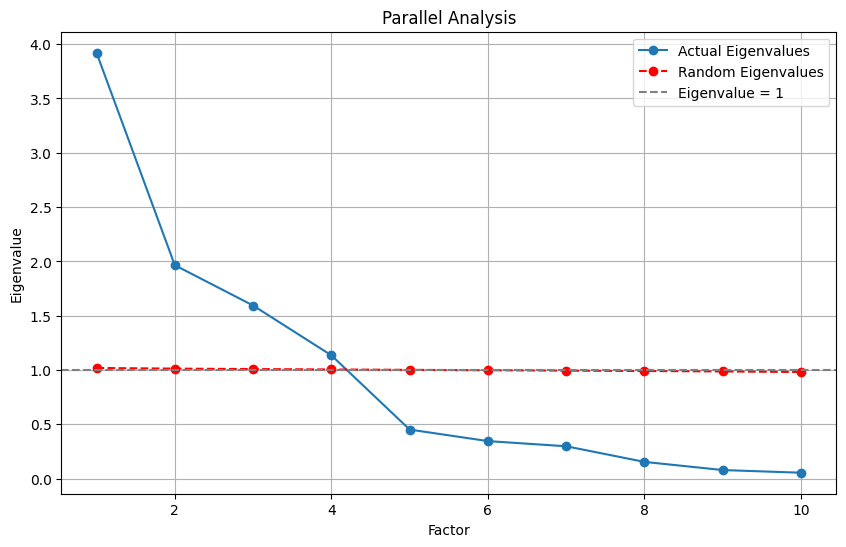

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label="Actual Eigenvalues")
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='o', linestyle='--', color='red', label="Random Eigenvalues")
plt.axhline(y=1, color='gray', linestyle='--', label="Eigenvalue = 1")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.title("Parallel Analysis")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax", method="principal")
fa.fit(efa_data5)

# Step 1: Get loadings as a numeric DataFrame
loadings = fa.loadings_
loading_df = pd.DataFrame(loadings, columns=[f"Factor{i+1}" for i in range(loadings.shape[1])], index=efa_cols5)

# Step 2: Reindex to your chosen variable order
loading_df = loading_df.reindex(efa_cols5)

# Step 3: Calculate "note" before modifying the values
notes = []
for i, row in loading_df.iterrows():
    sorted_loadings = row[["Factor1", "Factor2", "Factor3", "Factor4"]].abs().sort_values(ascending=False)
    v1, v2 = sorted_loadings.iloc[0], sorted_loadings.iloc[1]
    note_value = np.sqrt(v1) / np.sqrt(v2)
    notes.append(note_value)

# Step 4: Add notes and apply threshold
loading_df["note"] = notes
loading_df["note"] = loading_df["note"].apply(lambda x: x if x < 1.5 else " ")

# Step 5: (Optional) Create a pretty version with blanked small values
pretty_loading_df = loading_df.copy()
for col in ["Factor1", "Factor2", "Factor3", "Factor4"]:
    pretty_loading_df[col] = pretty_loading_df[col].apply(lambda x: x if abs(x) > 0.3 else " ")

# Step 6: Build your summary table
summary_df = pd.DataFrame({
    "Communalities": fa.get_communalities(),  # or loading_df["Extraction Communalities"] if precomputed
    "Factor1": pretty_loading_df["Factor1"],
    "Factor2": pretty_loading_df["Factor2"],
    "Factor3": pretty_loading_df["Factor3"],
    "Factor4": pretty_loading_df["Factor4"],
    "note": pretty_loading_df["note"]
}, index=efa_cols5)

summary_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Communalities   Factor1   Factor2   Factor3   Factor4 note
Pop2010                  0.958852            0.968506                         
OHU2010                  0.959947            0.970158                         
PovertyRate              0.755782  0.809056                                   
MedianFamilyIncome       0.699709 -0.820439                                   
TractLOWI                0.704223  0.816888                                   
TractWhite               0.960237                     -0.316692 -0.895783     
TractBlack               0.952965                                0.918251     
TractOMultir             0.942042                      0.954065               
TractHispanic            0.919931                      0.945331               
TractSNAP                0.762476  0.822663

In [ ]:
# Replace Factor names with the new labels
new_labels = ["Socioeconomic Need", "Tract Size", "Ethnic Diversity", "Racial Composition"]
variance_df_4 = variance_df[:4]
variance_df_4["Factor"] = new_labels

# Set Factor names as columns and create a new table
summary_table = pd.DataFrame({
    "Socioeconomic Need": variance_df_4[variance_df_4["Factor"] == "Socioeconomic Need"][["Eigenvalue", "Proportion of Variance (%)", "Cumulative Variance (%)"]].values[0],
    "Tract Size": variance_df_4[variance_df_4["Factor"] == "Tract Size"][["Eigenvalue", "Proportion of Variance (%)", "Cumulative Variance (%)"]].values[0],
    "Ethnic Diversity": variance_df_4[variance_df_4["Factor"] == "Ethnic Diversity"][["Eigenvalue", "Proportion of Variance (%)", "Cumulative Variance (%)"]].values[0],
    "Racial Composition": variance_df_4[variance_df_4["Factor"] == "Racial Composition"][["Eigenvalue", "Proportion of Variance (%)", "Cumulative Variance (%)"]].values[0]
}, index=["Eigenvalue", "% of Variance", "Cumulative %"])

# Display the resulting summary table
summary_table

/tmp/ipython-input-4293607406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variance_df_4["Factor"] = new_labels


Socioeconomic Need  Tract Size  Ethnic Diversity  \
Eigenvalue               3.921169    1.965438          1.594068   
% of Variance           39.211695   19.654376         15.940683   
Cumulative %            39.211695   58.866071         74.806754   

               Racial Composition  
Eigenvalue               1.135489  
% of Variance           11.354891  
Cumulative %            86.161645

## Use EFA as features for Food Desert Classification - Logistic Regression Models

In [ ]:
# Extract factor scores
factor_scores = fa.transform(efa_data5)
factor_df = pd.DataFrame(factor_scores, columns=[
    "SocioeconomicNeed", "TractSize", "EthnicDiversity", "RacialComposition"
])
factor_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


SocioeconomicNeed  TractSize  EthnicDiversity  RacialComposition
0          -0.185445  -1.290601        -0.618817          -0.292774
1           0.155638  -1.054934        -0.728103           1.595620
2           0.238459  -0.453411        -0.609431          -0.044713
3          -0.360527   0.075149        -0.622439          -0.595780
4          -0.132643   3.466017        -0.650098           0.152789

In [ ]:
# Add Food Desert indicator back on
model_data = pd.concat([factor_df, my_data[target_col]], axis=1)
model_data.head()


SocioeconomicNeed  TractSize  EthnicDiversity  RacialComposition  LA1and10
0          -0.185445  -1.290601        -0.618817          -0.292774       1.0
1           0.155638  -1.054934        -0.728103           1.595620       1.0
2           0.238459  -0.453411        -0.609431          -0.044713       1.0
3          -0.360527   0.075149        -0.622439          -0.595780       1.0
4          -0.132643   3.466017        -0.650098           0.152789       1.0

### LA1and10

In [ ]:
model_data[target_col].value_counts(normalize=True)

LA1and10
0.0         0.620169
1.0         0.379831
Name: proportion, dtype: float64

In [ ]:
# split into train and test
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


X = sm.add_constant(model_data.drop(target_col, axis=1))
y = model_data[target_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Run a logistic regression

# Fit the logistic regression model using the training set
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.632735
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LA1and10   No. Observations:                58021
Model:                          Logit   Df Residuals:                    58016
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                 0.04706
Time:                        01:25:03   Log-Likelihood:                -36712.
converged:                       True   LL-Null:                       -38525.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5295      0.009    -59.218      0.000      -0.547      -0.512
Socioeco

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate predictions for the validation set
validation_pred_probs = model.predict(X_test)
validation_pred = np.where(validation_pred_probs >= 0.5, 1, 0)


# Compute the confusion matrix for the validation set
validation_conf_matrix = confusion_matrix(y_test, validation_pred)

tn_validation, fp_validation = validation_conf_matrix[0]
fn_validation, tp_validation = validation_conf_matrix[1]

# Accuracy: Correct Predictions / All Predictions
accuracy = (tn_validation + tp_validation)/(tn_validation + tp_validation + fn_validation + fp_validation)

# Precision: Correct & Positive Predictions / All Positive Predictions
precision = tp_validation/(tp_validation + fp_validation)

# Sensitivity (Recall): True Positive / True Positive + False Negative
sensitivity = tp_validation/(tp_validation + fn_validation)

# Specificity: True Negative / True Negative + False Positive
specificity = tn_validation/(tn_validation + fp_validation)

# F1 Score: 2 * Precision * Sensitivity/(Precision + Sensitivity)
f1 = 2*(precision * sensitivity)/(precision + sensitivity)

print("Validation set confusion matrix: \n", validation_conf_matrix)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")
print(f"F1-Score: {f1:.2f}")

Validation set confusion matrix: 
 [[8154  842]
 [4274 1236]]
Accuracy: 64.73%
Precision: 59.48%
Sensitivity (Recall): 22.43%
Specificity: 90.64%
F1-Score: 0.33


### Add urban status as a predictor

In [ ]:
# confirm original indices are maintained
model_data.index.isin(food.index).all()

np.True_

In [ ]:
# Urban/Rural Indicator
model_data['Urban'] = food.loc[model_data.index, 'Urban']

X = sm.add_constant(model_data.drop(target_col, axis=1))
y = model_data[target_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Run a logistic regression

# Fit the logistic regression model using the training set
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.632644
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LA1and10   No. Observations:                58021
Model:                          Logit   Df Residuals:                    58015
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                 0.04719
Time:                        01:25:04   Log-Likelihood:                -36707.
converged:                       True   LL-Null:                       -38525.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5833      0.019    -30.895      0.000      -0.620      -0.546
Socioeco

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate predictions for the validation set
validation_pred_probs = model.predict(X_test)
validation_pred = np.where(validation_pred_probs >= 0.5, 1, 0)


# Compute the confusion matrix for the validation set
validation_conf_matrix = confusion_matrix(y_test, validation_pred)

tn_validation, fp_validation = validation_conf_matrix[0]
fn_validation, tp_validation = validation_conf_matrix[1]

# Accuracy: Correct Predictions / All Predictions
accuracy = (tn_validation + tp_validation)/(tn_validation + tp_validation + fn_validation + fp_validation)

# Precision: Correct & Positive Predictions / All Positive Predictions
precision = tp_validation/(tp_validation + fp_validation)

# Sensitivity (Recall): True Positive / True Positive + False Negative
sensitivity = tp_validation/(tp_validation + fn_validation)

# Specificity: True Negative / True Negative + False Positive
specificity = tn_validation/(tn_validation + fp_validation)

# F1 Score: 2 * Precision * Sensitivity/(Precision + Sensitivity)
f1 = 2*(precision * sensitivity)/(precision + sensitivity)

print("Validation set confusion matrix: \n", validation_conf_matrix)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")
print(f"F1-Score: {f1:.2f}")

Validation set confusion matrix: 
 [[8153  843]
 [4268 1242]]
Accuracy: 64.77%
Precision: 59.57%
Sensitivity (Recall): 22.54%
Specificity: 90.63%
F1-Score: 0.33


### LILA1and10

In [ ]:
model_data['LILATracts_1And10'] = food.loc[model_data.index, 'LILATracts_1And10']
model_data['LILATracts_1And10'].value_counts(normalize=True)

LILATracts_1And10
0    0.871868
1    0.128132
Name: proportion, dtype: float64

In [ ]:
model_data.head()

SocioeconomicNeed  TractSize  EthnicDiversity  RacialComposition  LA1and10  \
0          -0.185445  -1.290601        -0.618817          -0.292774       1.0   
1           0.155638  -1.054934        -0.728103           1.595620       1.0   
2           0.238459  -0.453411        -0.609431          -0.044713       1.0   
3          -0.360527   0.075149        -0.622439          -0.595780       1.0   
4          -0.132643   3.466017        -0.650098           0.152789       1.0   

   Urban  LILATracts_1And10  
0      1                  0  
1      1                  1  
2      1                  0  
3      1                  0  
4      1                  0

In [ ]:
model_data.drop('LA1and10', axis=1, inplace=True)

In [ ]:
X = sm.add_constant(model_data.drop('LILATracts_1And10', axis=1))
y = model_data['LILATracts_1And10']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Run a logistic regression

# Fit the logistic regression model using the training set
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.361516
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      LILATracts_1And10   No. Observations:                58021
Model:                          Logit   Df Residuals:                    58015
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                 0.05562
Time:                        01:25:04   Log-Likelihood:                -20976.
converged:                       True   LL-Null:                       -22211.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.7399      0.034    -80.689      0.000      -2.806      -2.673
Socioeco

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate predictions for the validation set
validation_pred_probs = model.predict(X_test)
validation_pred = np.where(validation_pred_probs >= 0.5, 1, 0)


# Compute the confusion matrix for the validation set
validation_conf_matrix = confusion_matrix(y_test, validation_pred)

tn_validation, fp_validation = validation_conf_matrix[0]
fn_validation, tp_validation = validation_conf_matrix[1]

# Accuracy: Correct Predictions / All Predictions
accuracy = (tn_validation + tp_validation)/(tn_validation + tp_validation + fn_validation + fp_validation)

# Precision: Correct & Positive Predictions / All Positive Predictions
precision = tp_validation/(tp_validation + fp_validation)

# Sensitivity (Recall): True Positive / True Positive + False Negative
sensitivity = tp_validation/(tp_validation + fn_validation)

# Specificity: True Negative / True Negative + False Positive
specificity = tn_validation/(tn_validation + fp_validation)

# F1 Score: 2 * Precision * Sensitivity/(Precision + Sensitivity)
f1 = 2*(precision * sensitivity)/(precision + sensitivity)

print("Validation set confusion matrix: \n", validation_conf_matrix)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")
print(f"F1-Score: {f1:.2f}")

Validation set confusion matrix: 
 [[12630    17]
 [ 1853     6]]
Accuracy: 87.11%
Precision: 26.09%
Sensitivity (Recall): 0.32%
Specificity: 99.87%
F1-Score: 0.01


### LAVehicle20

In [ ]:
model_data['LATractsVehicle_20'] = food.loc[model_data.index, 'LATractsVehicle_20']
model_data['LATractsVehicle_20'].value_counts(normalize=True)

LATractsVehicle_20
0    0.785239
1    0.214761
Name: proportion, dtype: float64

In [ ]:
model_data.drop('LILATracts_1And10', axis=1, inplace=True)

In [ ]:
X = sm.add_constant(model_data.drop('LATractsVehicle_20', axis=1))
y = model_data['LATractsVehicle_20']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Run a logistic regression

# Fit the logistic regression model using the training set
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.494398
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     LATractsVehicle_20   No. Observations:                58021
Model:                          Logit   Df Residuals:                    58015
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                 0.04961
Time:                        01:25:05   Log-Likelihood:                -28685.
converged:                       True   LL-Null:                       -30183.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6233      0.023    -69.522      0.000      -1.669      -1.578
Socioeco

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate predictions for the validation set
validation_pred_probs = model.predict(X_test)
validation_pred = np.where(validation_pred_probs >= 0.5, 1, 0)


# Compute the confusion matrix for the validation set
validation_conf_matrix = confusion_matrix(y_test, validation_pred)

tn_validation, fp_validation = validation_conf_matrix[0]
fn_validation, tp_validation = validation_conf_matrix[1]

# Accuracy: Correct Predictions / All Predictions
accuracy = (tn_validation + tp_validation)/(tn_validation + tp_validation + fn_validation + fp_validation)

# Precision: Correct & Positive Predictions / All Positive Predictions
precision = tp_validation/(tp_validation + fp_validation)

# Sensitivity (Recall): True Positive / True Positive + False Negative
sensitivity = tp_validation/(tp_validation + fn_validation)

# Specificity: True Negative / True Negative + False Positive
specificity = tn_validation/(tn_validation + fp_validation)

# F1 Score: 2 * Precision * Sensitivity/(Precision + Sensitivity)
f1 = 2*(precision * sensitivity)/(precision + sensitivity)

print("Validation set confusion matrix: \n", validation_conf_matrix)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")
print(f"F1-Score: {f1:.2f}")

Validation set confusion matrix: 
 [[11222   169]
 [ 2964   151]]
Accuracy: 78.40%
Precision: 47.19%
Sensitivity (Recall): 4.85%
Specificity: 98.52%
F1-Score: 0.09


## Recheck Logistic Regression Assumptions

In [ ]:
# Calculate VIF for each predictor variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

In [ ]:
vif_data

Variable       VIF  Tolerance
0              const  4.603040   0.217248
1  SocioeconomicNeed  1.011920   0.988220
2          TractSize  1.000002   0.999998
3    EthnicDiversity  1.054248   0.948543
4  RacialComposition  1.067723   0.936572
5              Urban  1.133894   0.881917

### Additional Visualizations

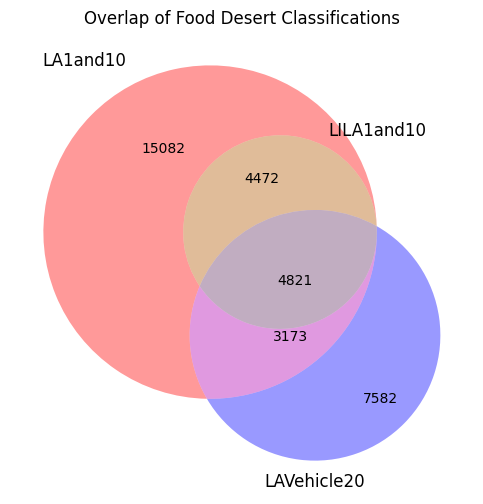

In [ ]:
from matplotlib_venn import venn3

set1 = set(food[food['LA1and10'] == 1].index)
set2 = set(food[food['LILATracts_1And10'] == 1].index)
set3 = set(food[food['LATractsVehicle_20'] == 1].index)

plt.figure(figsize=(8,6))
venn3([set1, set2, set3],
      set_labels = ('LA1and10', 'LILA1and10', 'LAVehicle20'))
plt.title("Overlap of Food Desert Classifications")
plt.show()